In [1]:
from tcsim.system import*
from tcsim.visualization import*
from tcsim.gates import*
from scipy import optimize
from qutip import*
import random

In [54]:
X = (a.dag()+a)/2
P = (1j*(a.dag()-a))/2

def calc_squeez_parameter(dB):
    return np.log(10**(dB/10))/2

def hastrup_three_steps(uvs):
    alpha = 1.8
    cat = (coherent(N,alpha) - coherent(N,-alpha)).unit()
    cat_tensor = tensor(fock(2,0),cat)
    
    
    u_1 = uvs[0]
    v_1 = uvs[1]
    u_2 = uvs[2]
    v_2 = uvs[3]
    u_3 = uvs[4]
    v_3 = uvs[5]

    psi1 = V_ideal_operator(v_1)*U_ideal_operator(u_1)*cat_tensor
    psi2 = V_ideal_operator(v_2)*U_ideal_operator(u_2)*psi1
    psi3 = V_ideal_operator(v_3)*U_ideal_operator(u_3)*psi2
    return psi3

def hastrup_four_steps(uvs):
    alpha = 1.8
    cat = (coherent(N,alpha) - coherent(N,-alpha)).unit()
    cat_tensor = tensor(fock(2,0),cat)
    
    
    u_1 = uvs[0]
    v_1 = uvs[1]
    u_2 = uvs[2]
    v_2 = uvs[3]
    u_3 = uvs[4]
    v_3 = uvs[5]
    u_4 = uvs[6]
    v_4 = uvs[7]

    psi1 = V_ideal_operator(v_1)*U_ideal_operator(u_1)*cat_tensor
    psi2 = V_ideal_operator(v_2)*U_ideal_operator(u_2)*psi1
    psi3 = V_ideal_operator(v_3)*U_ideal_operator(u_3)*psi2
    psi4 = V_ideal_operator(v_4)*U_ideal_operator(u_4)*psi2
    return psi4

def overlap(uvs, wanted_state):
    
    state = hastrup_three_steps(uvs)
    #state = hastrup_four_steps(uvs)
    print(np.float((1-state.overlap(wanted_state))*np.conjugate((1-state.overlap(wanted_state)))) )
    return np.float((1-state.overlap(wanted_state))*np.conjugate((1-state.overlap(wanted_state)))) 

def find_opt_parameters(wanted_state):
   
    initial_guess = [random.randrange(-10, 10, 1)/10 for i in range(8)]
    initial_guess = [ 0.05042415, -0.36024377,  1.02733798,  0.54345306, -0.53510295,-0.06212451]
    bounds = [(-2,2), (-2,2),(-2,2),(-2,2),(-2,2),(-2,2)]
    #bounds = [(-2,2), (-2,2),(-2,2),(-2,2),(-2,2),(-2,2), (-2,2),(-2,2)]
    
    result = optimize.minimize(overlap, initial_guess, wanted_state, method= 'SLSQP', bounds=bounds )
    fitted_params = result.x
    if result.success:
        fitted_params = result.x
        #print(fitted_params)
    return fitted_params




In [55]:
# generate cat and sqeezed cat state
### States
alpha = 1.8
cat = (coherent(N,alpha) - coherent(N,-alpha)).unit()

dBs = [3,5, 6, 7]

# first squeezed vacuum, then cat
states1 = [((displace(N,alpha)-displace(N,-alpha))*squeeze(N,calc_squeez_parameter(db))*coherent(N,0)).unit() for db in dBs]


# first cat, then squeeze
states2 = [squeeze(N,calc_squeez_parameter(i))for i in dBs]*cat

In [56]:

wanted_state = states2[1]
wanted_state_tensor = tensor(fock(2,0),wanted_state)
params = []
for i in range(10):
    print(i)
    params.append(find_opt_parameters(wanted_state_tensor)) 

0


C:\Users\jonat\AppData\Local\Temp\ipykernel_33952\2506117035.py:50: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(np.float((1-state.overlap(wanted_state))*np.conjugate((1-state.overlap(wanted_state)))) )
C:\Users\jonat\AppData\Local\Temp\ipykernel_33952\2506117035.py:50: ComplexWarning: Casting complex values to real discards the imaginary part
  print(np.float((1-state.overlap(wanted_state))*np.conjugate((1-state.overlap(wanted_state)))) )
C:\Users\jonat\AppData\Local\Temp\ipykernel_33952\2506117035.py:51: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modif

0.010734075068161337
0.010734075164739891
0.01073407528037831
0.010734074619729281
0.010734074222705529
0.010734075160769203
0.01073407506711744
0.0071260011552689234
0.007126001193863912
0.0071260013146681915
0.007126000803949525
0.007126000639071775
0.00712600124385968
0.007126001241764265
0.0032053917300827765
0.003205391708201255
0.0032053917588248807
0.0032053915372191135
0.003205391579095175
0.0032053917867084017
0.0032053918414121745
0.002121413965073678
0.002121413923469661
0.002121413942090181
0.0021214138406077643
0.002121413930639837
0.0021214139991799557
0.0021214140571281133
0.0016680557557103505
0.001668055702297518
0.0016680557071347044
0.0016680556741575296
0.0016680557837209383
0.001668055771069571
0.0016680558243372145
0.001494030336973294
0.0014940302794245637
0.0014940302848124927
0.0014940302796242041
0.0014940303902977279
0.0014940303397109785
0.0014940303836161917
0.0013643641766149202
0.0013643641210939277
0.001364364136193785
0.0013643641385236089
0.00136436423

Text(0.5, 1.0, 'cat squeezed via hastrup')

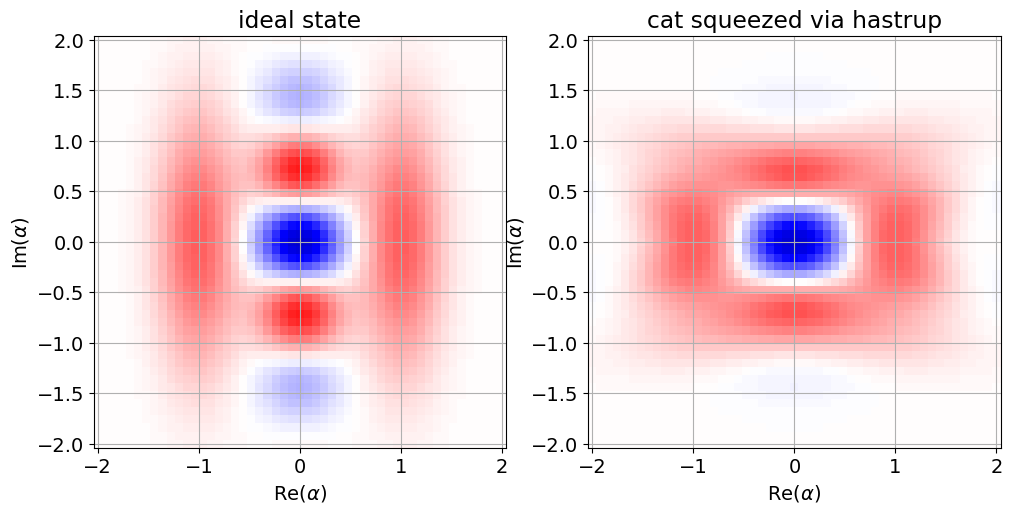

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [66]:
from tcsim.visualization import plot_wigner
uvs = params[]
state = hastrup_three_steps(uvs)

fig, axs = plt.subplots(1,2)
plot_wigner(wanted_state_tensor, ax = axs[0])
plot_wigner(state, ax = axs[1])
axs[0].set_title("ideal state")
axs[1].set_title("cat squeezed via hastrup")

In [44]:
params

[array([ 0.05042415, -0.36024377,  1.02733798,  0.54345306, -0.53510295,
        -0.06212451])]